# Bài tập Naive Bayes

## Sử dụng GaussianNB để phân nhóm cho tập Titanic dataset
- dataset: 'titanic.csv'


Nguyễn Trường Thành
2270084

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [3]:
df = pd.read_csv("dataset/titanic.csv")


## 1) Phân tích dữ liệu

In [4]:
df.shape


(891, 12)

In [5]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Clean data


In [7]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [10]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

#inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})


In [11]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)


,female,male
0,0,1
1,1,0
2,1,0


In [8]:
df.dtypes

Pclass        int64
Sex          object
Age         float64
Fare        float64
Survived      int64
dtype: object

In [12]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


I am dropping male column as well because of dummy variable trap theory. One column is enough to repressent male vs female



In [13]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


### Check NaN data

In [38]:
inputs.columns[inputs.isna().any()]


Index(['Age'], dtype='object')

In [39]:
inputs.Age[:10]


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [40]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [41]:
inputs.describe()

,Pclass,Age,Fare,female
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.352413
std,0.836071,13.002015,49.693429,0.477990
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,22.000000,7.910400,0.000000
50%,3.000000,29.699118,14.454200,0.000000
75%,3.000000,35.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [42]:
inputs.columns

Index(['Pclass', 'Age', 'Fare', 'female'], dtype='object')

There are 2 labels:
- Survived: 1
- Died: 0

In [43]:
inputs.female.value_counts()

0    577
1    314
Name: female, dtype: int64

### Visualization

Text(0, 0.5, '')

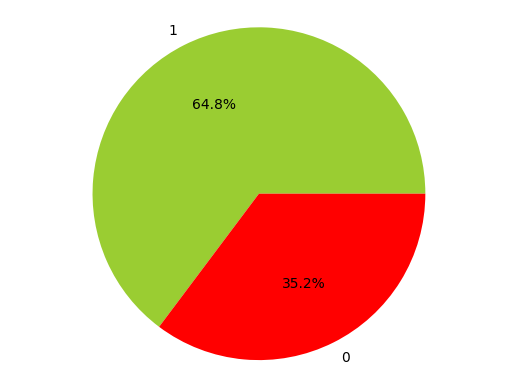

In [44]:
# Vẽ để xem tỉ lệ survied/died
fig, ax = plt.subplots(1, 1)
ax.pie(inputs.female.value_counts(), autopct='%1.1f%%', labels=[1, 0], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

## Chuẩn bị training data và test data

In [48]:
drop_list = []
inputs = inputs.drop(drop_list,axis=1)
print(inputs.columns)
#test train split time
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)



Index(['Pclass', 'Age', 'Fare', 'female'], dtype='object')


## Xây dựng mô hình phân lớp GaussianNB

In [49]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
# fit it to training data
clf.fit(X_train,y_train)
clf

GaussianNB()

In [50]:
# predict using test data
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1])

In [51]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob

array([[6.39823021e-14, 1.00000000e+00],
       [4.85655833e-01, 5.14344167e-01],
       [3.75273556e-01, 6.24726444e-01],
       [3.87923961e-01, 6.12076039e-01],
       [9.62571990e-01, 3.74280102e-02],
       [6.92209660e-03, 9.93077903e-01],
       [8.97279822e-01, 1.02720178e-01],
       [3.38150829e-01, 6.61849171e-01],
       [9.21676649e-01, 7.83233513e-02],
       [3.47681762e-01, 6.52318238e-01],
       [9.64329604e-01, 3.56703961e-02],
       [4.67352534e-01, 5.32647466e-01],
       [3.75068683e-01, 6.24931317e-01],
       [9.68275144e-01, 3.17248561e-02],
       [6.79426560e-01, 3.20573440e-01],
       [9.68303905e-01, 3.16960946e-02],
       [9.67078624e-01, 3.29213759e-02],
       [3.86999485e-01, 6.13000515e-01],
       [1.91779976e-01, 8.08220024e-01],
       [9.67283995e-01, 3.27160054e-02],
       [8.57158149e-06, 9.99991428e-01],
       [9.02092393e-01, 9.79076071e-02],
       [5.70978958e-01, 4.29021042e-01],
       [7.42835752e-03, 9.92571642e-01],
       [7.027100

In [52]:
train_pred = clf.predict(X_train)
train_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,

## Evaluation

#### Tập train

In [53]:
print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 

train-set confusion matrix:
 [[309  68]
 [ 73 173]]


#### Tập test

In [54]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))

test-set confusion matrix:
 [[134  38]
 [ 20  76]]
recall score:  0.7916666666666666


In [55]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))

test-set confusion matrix:
 [[134  38]
 [ 20  76]]
recall score:  0.7916666666666666


In [56]:
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))


precision score:  0.6666666666666666
f1 score:  0.7238095238095237


In [57]:
print("accuracy score: ", accuracy_score(y_test,y_pred))


accuracy score:  0.7835820895522388


In [58]:
print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

ROC AUC: 0.8433260658914729
